In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [2]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\1\2375.jpg
E:\MNIST\Train\1\2393.jpg
E:\MNIST\Train\1\24.jpg
E:\MNIST\Train\1\2410.jpg
E:\MNIST\Train\1\2415.jpg
E:\MNIST\Train\1\2419.jpg
E:\MNIST\Train\1\2426.jpg
E:\MNIST\Train\1\2429.jpg
E:\MNIST\Train\1\2432.jpg
E:\MNIST\Train\1\2437.jpg
E:\MNIST\Train\1\2446.jpg
E:\MNIST\Train\1\2448.jpg
E:\MNIST\Train\1\2462.jpg
E:\MNIST\Train\1\248.jpg
E:\MNIST\Train\1\2495.jpg
E:\MNIST\Train\1\2497.jpg
E:\MNIST\Train\1\2505.jpg
E:\MNIST\Train\1\251.jpg
E:\MNIST\Train\1\2530.jpg
E:\MNIST\Train\1\2547.jpg
E:\MNIST\Train\1\2552.jpg
E:\MNIST\Train\1\2563.jpg
E:\MNIST\Train\1\2572.jpg
E:\MNIST\Train\1\2583.jpg
E:\MNIST\Train\1\2594.jpg
E:\MNIST\Train\1\2599.jpg
E:\MNIST\Train\1\2604.jpg
E:\MNIST\Train\1\2616.jpg
E:\MNIST\Train\1\2619.jpg
E:\MNIST\Train\1\2623.jpg
E:\MNIST\Train\1\2630.jpg
E:\MNIST\Train\1\2645.jpg
E:\MNIST\Train\1\2654.jpg
E:\MNIST\Train\1\2663.jpg
E:\MNIST\Train\1\2667.jpg
E:\MNIST\Train\1\2688.jpg
E:\MNIST\Train\1\269.jpg
E:\MNIST\Train\1\2692.jpg
E:\MNIST\Train\1\

E:\MNIST\Train\2\5076.jpg
E:\MNIST\Train\2\5094.jpg
E:\MNIST\Train\2\5095.jpg
E:\MNIST\Train\2\5103.jpg
E:\MNIST\Train\2\5104.jpg
E:\MNIST\Train\2\5110.jpg
E:\MNIST\Train\2\5113.jpg
E:\MNIST\Train\2\5129.jpg
E:\MNIST\Train\2\5135.jpg
E:\MNIST\Train\2\515.jpg
E:\MNIST\Train\2\530.jpg
E:\MNIST\Train\2\548.jpg
E:\MNIST\Train\2\551.jpg
E:\MNIST\Train\2\555.jpg
E:\MNIST\Train\2\558.jpg
E:\MNIST\Train\2\563.jpg
E:\MNIST\Train\2\568.jpg
E:\MNIST\Train\2\570.jpg
E:\MNIST\Train\2\584.jpg
E:\MNIST\Train\2\588.jpg
E:\MNIST\Train\2\591.jpg
E:\MNIST\Train\2\619.jpg
E:\MNIST\Train\2\642.jpg
E:\MNIST\Train\2\646.jpg
E:\MNIST\Train\2\650.jpg
E:\MNIST\Train\2\657.jpg
E:\MNIST\Train\2\664.jpg
E:\MNIST\Train\2\673.jpg
E:\MNIST\Train\2\674.jpg
E:\MNIST\Train\2\684.jpg
E:\MNIST\Train\2\688.jpg
E:\MNIST\Train\2\693.jpg
E:\MNIST\Train\2\696.jpg
E:\MNIST\Train\2\713.jpg
E:\MNIST\Train\2\714.jpg
E:\MNIST\Train\2\716.jpg
E:\MNIST\Train\2\732.jpg
E:\MNIST\Train\2\76.jpg
E:\MNIST\Train\2\774.jpg
E:\MNIST\Train\2\

E:\MNIST\Train\4\3278.jpg
E:\MNIST\Train\4\3280.jpg
E:\MNIST\Train\4\329.jpg
E:\MNIST\Train\4\3290.jpg
E:\MNIST\Train\4\3312.jpg
E:\MNIST\Train\4\3315.jpg
E:\MNIST\Train\4\3334.jpg
E:\MNIST\Train\4\3340.jpg
E:\MNIST\Train\4\3350.jpg
E:\MNIST\Train\4\3351.jpg
E:\MNIST\Train\4\3352.jpg
E:\MNIST\Train\4\336.jpg
E:\MNIST\Train\4\3360.jpg
E:\MNIST\Train\4\3370.jpg
E:\MNIST\Train\4\338.jpg
E:\MNIST\Train\4\3388.jpg
E:\MNIST\Train\4\3399.jpg
E:\MNIST\Train\4\3417.jpg
E:\MNIST\Train\4\342.jpg
E:\MNIST\Train\4\3436.jpg
E:\MNIST\Train\4\3437.jpg
E:\MNIST\Train\4\3439.jpg
E:\MNIST\Train\4\3450.jpg
E:\MNIST\Train\4\3455.jpg
E:\MNIST\Train\4\3457.jpg
E:\MNIST\Train\4\3458.jpg
E:\MNIST\Train\4\3459.jpg
E:\MNIST\Train\4\3475.jpg
E:\MNIST\Train\4\3477.jpg
E:\MNIST\Train\4\3484.jpg
E:\MNIST\Train\4\3496.jpg
E:\MNIST\Train\4\3503.jpg
E:\MNIST\Train\4\3504.jpg
E:\MNIST\Train\4\354.jpg
E:\MNIST\Train\4\3547.jpg
E:\MNIST\Train\4\3548.jpg
E:\MNIST\Train\4\3573.jpg
E:\MNIST\Train\4\3608.jpg
E:\MNIST\Train\4\

E:\MNIST\Train\6\2635.jpg
E:\MNIST\Train\6\2637.jpg
E:\MNIST\Train\6\2638.jpg
E:\MNIST\Train\6\2644.jpg
E:\MNIST\Train\6\2656.jpg
E:\MNIST\Train\6\2657.jpg
E:\MNIST\Train\6\2662.jpg
E:\MNIST\Train\6\2680.jpg
E:\MNIST\Train\6\2710.jpg
E:\MNIST\Train\6\2723.jpg
E:\MNIST\Train\6\274.jpg
E:\MNIST\Train\6\2741.jpg
E:\MNIST\Train\6\2756.jpg
E:\MNIST\Train\6\2757.jpg
E:\MNIST\Train\6\2777.jpg
E:\MNIST\Train\6\2785.jpg
E:\MNIST\Train\6\2789.jpg
E:\MNIST\Train\6\2822.jpg
E:\MNIST\Train\6\2828.jpg
E:\MNIST\Train\6\2836.jpg
E:\MNIST\Train\6\2837.jpg
E:\MNIST\Train\6\2849.jpg
E:\MNIST\Train\6\2850.jpg
E:\MNIST\Train\6\286.jpg
E:\MNIST\Train\6\2862.jpg
E:\MNIST\Train\6\2863.jpg
E:\MNIST\Train\6\2880.jpg
E:\MNIST\Train\6\2884.jpg
E:\MNIST\Train\6\2898.jpg
E:\MNIST\Train\6\2910.jpg
E:\MNIST\Train\6\2913.jpg
E:\MNIST\Train\6\2923.jpg
E:\MNIST\Train\6\2925.jpg
E:\MNIST\Train\6\2930.jpg
E:\MNIST\Train\6\2947.jpg
E:\MNIST\Train\6\2954.jpg
E:\MNIST\Train\6\2967.jpg
E:\MNIST\Train\6\2978.jpg
E:\MNIST\Train

E:\MNIST\Train\8\2394.jpg
E:\MNIST\Train\8\240.jpg
E:\MNIST\Train\8\2400.jpg
E:\MNIST\Train\8\2413.jpg
E:\MNIST\Train\8\2421.jpg
E:\MNIST\Train\8\2425.jpg
E:\MNIST\Train\8\2442.jpg
E:\MNIST\Train\8\2444.jpg
E:\MNIST\Train\8\245.jpg
E:\MNIST\Train\8\2475.jpg
E:\MNIST\Train\8\2476.jpg
E:\MNIST\Train\8\2482.jpg
E:\MNIST\Train\8\2507.jpg
E:\MNIST\Train\8\2511.jpg
E:\MNIST\Train\8\2555.jpg
E:\MNIST\Train\8\2577.jpg
E:\MNIST\Train\8\2593.jpg
E:\MNIST\Train\8\2598.jpg
E:\MNIST\Train\8\2610.jpg
E:\MNIST\Train\8\2611.jpg
E:\MNIST\Train\8\2628.jpg
E:\MNIST\Train\8\2636.jpg
E:\MNIST\Train\8\265.jpg
E:\MNIST\Train\8\2668.jpg
E:\MNIST\Train\8\2672.jpg
E:\MNIST\Train\8\2678.jpg
E:\MNIST\Train\8\2679.jpg
E:\MNIST\Train\8\2681.jpg
E:\MNIST\Train\8\2682.jpg
E:\MNIST\Train\8\2683.jpg
E:\MNIST\Train\8\2685.jpg
E:\MNIST\Train\8\2687.jpg
E:\MNIST\Train\8\2699.jpg
E:\MNIST\Train\8\2761.jpg
E:\MNIST\Train\8\2768.jpg
E:\MNIST\Train\8\2781.jpg
E:\MNIST\Train\8\2805.jpg
E:\MNIST\Train\8\2810.jpg
E:\MNIST\Train\

E:\MNIST\Train\9\3588.jpg
E:\MNIST\Train\9\3594.jpg
E:\MNIST\Train\9\3598.jpg
E:\MNIST\Train\9\362.jpg
E:\MNIST\Train\9\3621.jpg
E:\MNIST\Train\9\3636.jpg
E:\MNIST\Train\9\364.jpg
E:\MNIST\Train\9\3645.jpg
E:\MNIST\Train\9\3649.jpg
E:\MNIST\Train\9\3653.jpg
E:\MNIST\Train\9\3662.jpg
E:\MNIST\Train\9\3663.jpg
E:\MNIST\Train\9\3678.jpg
E:\MNIST\Train\9\3696.jpg
E:\MNIST\Train\9\3704.jpg
E:\MNIST\Train\9\374.jpg
E:\MNIST\Train\9\3742.jpg
E:\MNIST\Train\9\3745.jpg
E:\MNIST\Train\9\3746.jpg
E:\MNIST\Train\9\3760.jpg
E:\MNIST\Train\9\3770.jpg
E:\MNIST\Train\9\3773.jpg
E:\MNIST\Train\9\3781.jpg
E:\MNIST\Train\9\3784.jpg
E:\MNIST\Train\9\3785.jpg
E:\MNIST\Train\9\3786.jpg
E:\MNIST\Train\9\3787.jpg
E:\MNIST\Train\9\3796.jpg
E:\MNIST\Train\9\3818.jpg
E:\MNIST\Train\9\3827.jpg
E:\MNIST\Train\9\383.jpg
E:\MNIST\Train\9\3834.jpg
E:\MNIST\Train\9\3847.jpg
E:\MNIST\Train\9\3852.jpg
E:\MNIST\Train\9\3867.jpg
E:\MNIST\Train\9\3874.jpg
E:\MNIST\Train\9\389.jpg
E:\MNIST\Train\9\3904.jpg
E:\MNIST\Train\9\

In [3]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [4]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [5]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [7]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
#Load model wothout classifier/fully connected layers
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    


87916544/87910968 [==============================] - 14s 0us/step


In [10]:
x = Flatten()(model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=model.input, outputs=prediction_layer)


In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [14]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback])
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 35s 185ms/step - loss: 0.8907 - accuracy: 0.7314 - val_loss: 0.6163 - val_accuracy: 0.8080
Epoch 2/5
157/157 [==============================] - 24s 152ms/step - loss: 0.4773 - accuracy: 0.8576 - val_loss: 0.4857 - val_accuracy: 0.8420
Epoch 3/5
157/157 [==============================] - 25s 158ms/step - loss: 0.3769 - accuracy: 0.8894 - val_loss: 0.4431 - val_accuracy: 0.8580
Epoch 4/5
157/157 [==============================] - 25s 159ms/step - loss: 0.3199 - accuracy: 0.9088 - val_loss: 0.3990 - val_accuracy: 0.8740
Epoch 5/5
157/157 [==============================] - 25s 161ms/step - loss: 0.2800 - accuracy: 0.9210 - val_loss: 0.3706 - val_accuracy: 0.8810


In [15]:
print(times)

[35.40981578826904, 23.837565183639526, 24.754419326782227, 24.91643238067627, 25.26545262336731]


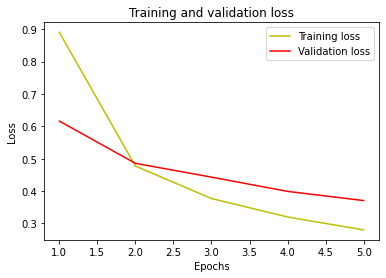

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

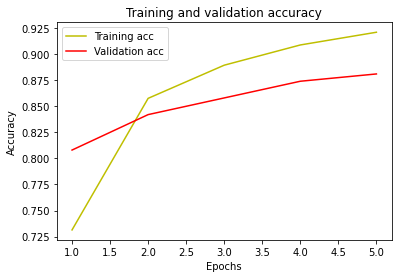

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[97  0  0  0  0  0  3  0  0  0]
 [ 0 99  0  0  0  0  0  1  0  0]
 [ 1  2 85  2  0  3  1  5  0  1]
 [ 0  0  2 84  1  9  0  1  3  0]
 [ 0  0  1  0 87  1  2  8  0  1]
 [ 0  0  1 16  1 77  2  1  2  0]
 [ 1  0  1  0  1  2 92  0  0  3]
 [ 0  0  7  0  4  0  0 87  0  2]
 [ 2  0  3  2  1  1  2  0 86  3]
 [ 0  1  0  1  1  0  2  3  5 87]]


<AxesSubplot:>

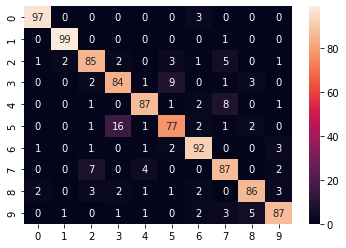

In [19]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [20]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.881


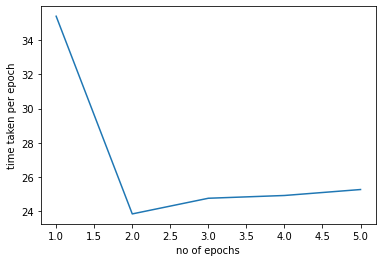

In [21]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = [35.40981578826904, 23.837565183639526, 24.754419326782227, 24.91643238067627, 25.26545262336731]

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


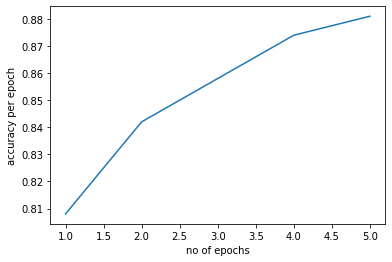

In [24]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [25]:
print(val_acc)

[0.8080000281333923, 0.8420000076293945, 0.8579999804496765, 0.8740000128746033, 0.8809999823570251]
